In [1]:
import numpy as np

# Function to generate synthetic user-item interaction matrices
def generate_interaction_matrix(feedback_type='implicit', num_users=100, num_items=50, interaction_density=0.1, rating_scale=(1, 5)):
    np.random.seed(42)  # Ensure reproducible results
    
    # Generate implicit feedback matrix
    if feedback_type == 'implicit':
        # Create a random matrix with values in [0, 1)
        random_matrix = np.random.rand(num_users, num_items)
        # Create a binary interaction matrix based on the defined density
        interaction_matrix = (random_matrix < interaction_density).astype(int)
    # Generate explicit feedback matrix
    elif feedback_type == 'explicit':
        # Start with a matrix of zeros
        interaction_matrix = np.zeros((num_users, num_items))
        # Populate the matrix with random ratings within the specified scale
        for i in range(num_users):
            for j in range(num_items):
                if np.random.rand() < interaction_density:  # Apply density to decide on filling a cell
                    interaction_matrix[i, j] = np.random.randint(rating_scale[0], rating_scale[1] + 1)
    
    return interaction_matrix

In [2]:
# Generate synthetic matrices
implicit_matrix = generate_interaction_matrix(feedback_type='implicit', num_users=100, num_items=50, interaction_density=0.1)
explicit_matrix = generate_interaction_matrix(feedback_type='explicit', num_users=100, num_items=50, interaction_density=0.1)

# Display samples from the generated matrices
print("Generated Implicit Feedback Matrix Sample:")
print(implicit_matrix[:5, :5])  # Display a 5x5 sample of the implicit matrix

print("Generated Explicit Feedback Matrix Sample:")
print(explicit_matrix[:5, :5])  # Display a 5x5 sample of the explicit matrix

Generated Implicit Feedback Matrix Sample:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]
Generated Explicit Feedback Matrix Sample:
[[0. 0. 0. 0. 0.]
 [0. 0. 4. 5. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [3]:
# Example of a manually created user-item interaction matrix with explicit feedback
user_item_matrix = np.array([
    [3, 0, 2, 0, 0],
    [0, 0, 4, 5, 2],
    [1, 2, 0, 0, 0],
    [1, 0, 0, 4, 1],
    [0, 2, 3, 0, 0]
])

In [4]:
import numpy as np

def sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations):
    # num_factors: Number of latent factors to use. Higher values can capture more nuanced patterns but risk overfitting.
    # learning_rate: Controls the step size during optimization. Too high can cause overshooting, too low can lead to slow convergence.
    # regularization: Helps prevent overfitting by penalizing large parameter values.
    num_users, num_items = user_item_matrix.shape
    errors = []  # To store RMSE after each iteration
    
    # Initialize user and item latent factor matrices with small random values
    print("init user and item latent factors")
    user_factors = np.random.normal(scale=1./num_factors, size=(num_users, num_factors))
    item_factors = np.random.normal(scale=1./num_factors, size=(num_items, num_factors))
    
    # Iterate over the specified number of iterations
    for iteration in range(iterations):
        total_error = 0
        # Loop through all user-item pairs
        for u in range(num_users):
            # print(f'user = {u}')
            for i in range(num_items):
                #  print(f'item = {i}')
                # Only update factors for user-item pairs with interaction
                if user_item_matrix[u, i] > 0:
                    # Compute the prediction error
                    error = user_item_matrix[u, i] - np.dot(user_factors[u, :], item_factors[i, :].T)
                    total_error += error**2
                    # Update rules for user and item factors
                    user_factors[u, :] += learning_rate * (error * item_factors[i, :] - regularization * user_factors[u, :])
                    item_factors[i, :] += learning_rate * (error * user_factors[u, :] - regularization * item_factors[i, :])
        # Calculate RMSE for current iteration
        rmse = np.sqrt(total_error / np.count_nonzero(user_item_matrix))
        errors.append(rmse)

    return user_factors, item_factors, errors

def predict(user_factors, item_factors):
    """Predict the user-item interactions."""
    return np.dot(user_factors, item_factors.T)

In [5]:
# Example usage parameters
num_factors = 3  # Number of latent factors
learning_rate = 0.001  # Learning rate for SGD
regularization = 0.1  # Regularization parameter
iterations = 10000  # Number of iterations

# Apply SGD ALS
# user_factors, item_factors, errors = sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations)
user_factors, item_factors, errors = sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations)
# Predict interactions
predictions = predict(user_factors, item_factors)

print("Predictions:")
print(predictions)
# init user and item latent factors
# Predictions:
# [[2.74673304 1.67873889 2.02095291 1.81543743 1.40078986]
#  [2.19166299 1.95915441 3.82886553 4.92874692 1.83125884]
#  [1.01791858 1.81996846 1.30796385 1.05506906 0.69961991]
#  [0.9771647  0.94682205 2.6555658  3.77808443 1.12173388]
#  [1.75792289 1.94502747 2.86182183 3.41910276 1.40167863]]

init user and item latent factors
Predictions:
[[2.751451   1.11286459 2.01391176 2.12328014 1.3543752 ]
 [2.17070876 2.08920653 3.83414642 4.9177779  1.85324007]
 [0.98936107 1.82105859 1.93081102 1.53343248 0.91175759]
 [0.99661501 0.91562097 2.45322376 3.7857576  1.09137982]
 [1.51150269 1.96518922 2.85363483 3.17031289 1.35631854]]


In [6]:
user_factors

array([[ 0.5275021 , -1.32424303,  1.0975428 ],
       [-0.70427385, -1.9675353 ,  0.17288093],
       [-0.92081488, -0.5753097 ,  0.7232044 ],
       [-0.39355645, -1.40317741, -0.5144479 ],
       [-0.85366911, -1.23365982,  0.43804708]])

In [7]:
item_factors

array([[ 0.37819939, -1.15699491,  0.9291734 ],
       [-1.00695755, -0.6373535 ,  0.72892455],
       [-0.85493544, -1.61675116,  0.2951325 ],
       [-0.6485705 , -2.31540191, -0.54736125],
       [-0.21154469, -0.83762758,  0.32503788]])

In [8]:
(user_factors.shape, item_factors.shape)

((5, 3), (5, 3))

In [9]:
np.matmul(user_factors,item_factors.T)

array([[2.751451  , 1.11286459, 2.01391176, 2.12328014, 1.3543752 ],
       [2.17070876, 2.08920653, 3.83414642, 4.9177779 , 1.85324007],
       [0.98936107, 1.82105859, 1.93081102, 1.53343248, 0.91175759],
       [0.99661501, 0.91562097, 2.45322376, 3.7857576 , 1.09137982],
       [1.51150269, 1.96518922, 2.85363483, 3.17031289, 1.35631854]])

In [10]:
user_item_matrix

array([[3, 0, 2, 0, 0],
       [0, 0, 4, 5, 2],
       [1, 2, 0, 0, 0],
       [1, 0, 0, 4, 1],
       [0, 2, 3, 0, 0]])

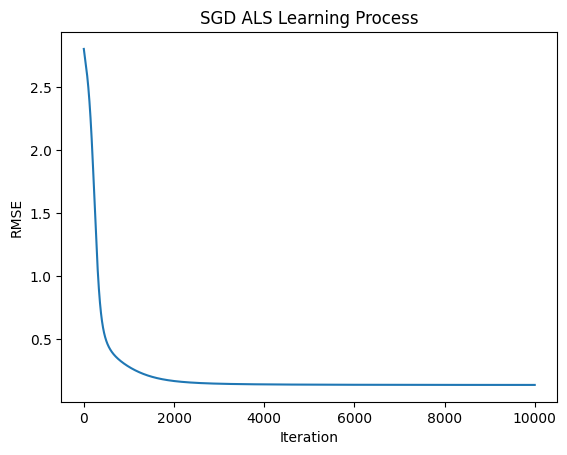

In [11]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.title('SGD ALS Learning Process')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()